## Override:
* override: sobre-escritura
* overwrite: sobre-escritura (borron y cuenta nueva)
* overload

En espanol los dos primeros son lo mismo. En ingles, se supone que el primero es un cambio simple y el segundo un cambio mas profundo. En realidad los consideramos iguales.
Para mas informacion consultar
[StackOverflow](https://stackoverflow.com/questions/30330007/what-is-difference-between-method-overwrite-and-override-in-python)

Que es override: una clase hija redefine un metodo con el mismo nombre y argumentos pero distinto comportamiento. Override esta en la interseccion entre herencia y polimorfismo.

Ejemplo



In [2]:
# En colombia la edad legal para ir a un bar es 18 anhos
# En USA es 21 anhos. 
# definimos una clase padre en colombia y una clase hija para
# usuarios en USA donde hacemos una sobre-escritura. 

class Person:
    def __init__(self, name, age, inBar):
        self.name = name
        self.age = age
        self.inBar = inBar
        return

    def adult(self):
        return self.age >= 18  # in Colombia
       
    def fineBarOwner(self):
        if not self.adult()   and self.inBar:
            print("%s, you should not be here"%self.name)
            print("You and the bar owner are in trouble")
        else:
            print("%s, you are fine: You are a good guy"%self.name)
        return

class Drinker(Person):
    def adult(self):  #  here is the overriding
        return self.age >= 21  # en USA
    
    def fineBarOwner(self):
        super().fineBarOwner()
        return

jesus = Person("Jesus", 15, True)
print(jesus.__dict__)
jesus.fineBarOwner()

{'name': 'Jesus', 'age': 15, 'inBar': True}
Jesus, you should not be here
You and the bar owner are in trouble


In [4]:
robert = Drinker("Roberto", 18, True)  # en USA
robert.fineBarOwner()

Roberto, you should not be here
You and the bar owner are in trouble


In [5]:
robert = Person("Roberto", 18, True) # en Colombia
robert.fineBarOwner()

Roberto, you are fine: You are a good guy


## Herencia multiple (multiple inheritance)
Esto ocurre cuando se hereda de varias "superclasses".
Esto no siempre es recomendado y Java no lo maneja. 
Explico esto en la proxima clase.
Veamos un ejemplo.

In [6]:
from os import confstr
class Merchandise:

    def __init__(self, number, cost):
        self.number = number
        self.cost = cost
        return

    def computeTotalCost(self):
        total = self.number * self.cost
        return total

class Fruit:

    def __init__(self, name):
        self.name = name
        return

class Item(Merchandise, Fruit):
    def __init__(self, name, number, cost):
        Fruit.__init__(self, name)
        Merchandise.__init__(self, number, cost)
        return

orange = Item("Orange", 300, 23.5)
orange.__dict__


{'name': 'Orange', 'number': 300, 'cost': 23.5}

In [7]:
orange.computeTotalCost()

7050.0

# Ejemplo: Problema del diamante
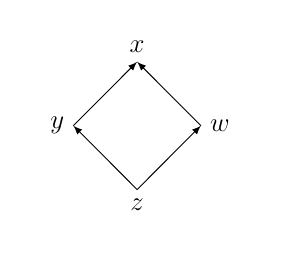

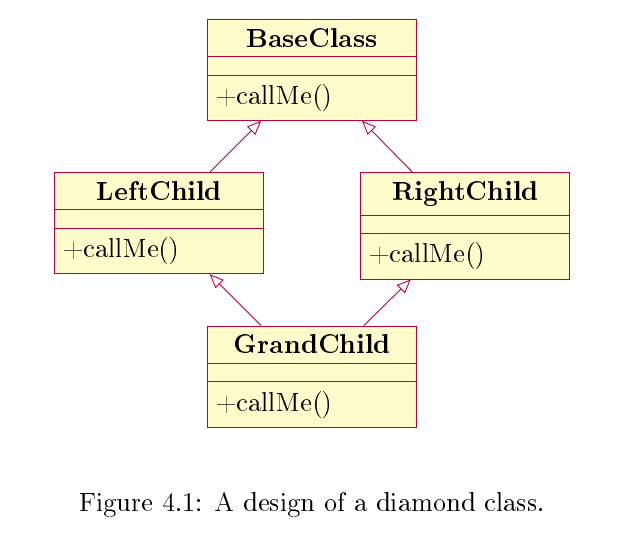

In [10]:
# Ejemplo:
class BaseClass:
    countBase = 0 # contador para cada clase
    def callMe(self):
        print("called from base class")
        self.countBase += 1
        return

class  LeftChild(BaseClass):
        countLeft = 0 
        def callMe(self):
            BaseClass.callMe(self)
            print("called from leftChild")
            self.countLeft += 1
            return

class  RightChild(BaseClass):
        countRight = 0 
        def callMe(self):
            BaseClass.callMe(self)
            print("called from rightChild")
            self.countRight += 1
            return

class GrandChild(LeftChild, RightChild):
    countGrand = 0
    def callMe(self):
        LeftChild.callMe(self)
        RightChild.callMe(self)
        print("called from grand child")
        self.countGrand += 1
        return

granC = GrandChild()
granC.callMe()

 


called from base class
called from leftChild
called from base class
called from rightChild
called from grand child


In [11]:
vars(granC)

{'countBase': 2, 'countLeft': 1, 'countRight': 1, 'countGrand': 1}

In [15]:
## que pasa si usamos super
# Ejemplo:
class BaseClass:
    countBase = 0 # contador para cada clase
    def callMe(self):
        print("called from base class")
        self.countBase += 1
        return

class  LeftChild(BaseClass):
        countLeft = 0 
        def callMe(self):
            super().callMe()
            print("called from leftChild")
            self.countLeft += 1
            return

class  RightChild(BaseClass):
        countRight = 0 
        def callMe(self):
            super().callMe()
            print("called from rightChild")
            self.countRight += 1
            return

class GrandChild(LeftChild, RightChild):
    countGrand = 0
    def callMe(self):
        super().callMe()
        print("called from grand child")
        self.countGrand += 1
        return

granC = GrandChild()
granC.callMe()

 


called from base class
called from rightChild
called from leftChild
called from base class
called from rightChild
called from leftChild
called from grand child


In [14]:
vars(granC)

{'countBase': 1, 'countRight': 1, 'countLeft': 1, 'countGrand': 1}